In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement


A company sells 3 types of treadmill our job is to determine insights on what types of customer mostly gets his/her job done on which type of treadmill from the data provided by them.

# Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary.

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


* There are 180 tuple, 8 attributes.
* We also dont have any missing or null values.
* A small description of the data can be seen above in df.describe() table.
* Most sold product is "KP281" which is the cheapest entry level treadmill, most customers are male and most people are partnered.


# Non-Graphical Analysis: Value counts and unique attributes 

In [7]:
cols = ["Age","Education","Usage","Fitness","Miles"]
for col in cols:
    print(col)
    print(df[col].value_counts()[:10])
    print("-"*20)
    print()

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
Name: Age, dtype: int64
--------------------

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
--------------------

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
--------------------

Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
--------------------

Miles
85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
Name: Miles, dtype: int64
--------------------



In [8]:
print(df.loc[df["Income"]<=50000]["Income"].count())
print(df.loc[df["Income"]>50000]["Income"].count())

83
97


In [9]:
for col in cols:
    print(col)
    print(df[col].nunique())
    print("-"*20)

Age
32
--------------------
Education
8
--------------------
Usage
6
--------------------
Fitness
5
--------------------
Miles
37
--------------------


* People of age 25 are the people who buys the treadmill the most.
* Education, useage, fitness etc counts can be seen above
* There are 83 people whom have an income of less then 50k usd and 97 who have more than 50k usd.
* Number of unique counts can also be seen above.

# Visual Analysis - Univariate & Bivariate

## Continuous variable

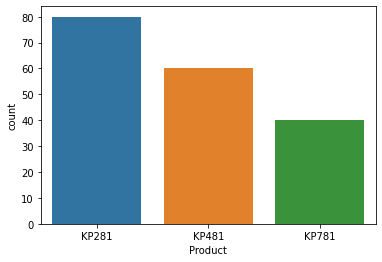

In [10]:
sns.countplot(x = "Product",data = df)
plt.show()

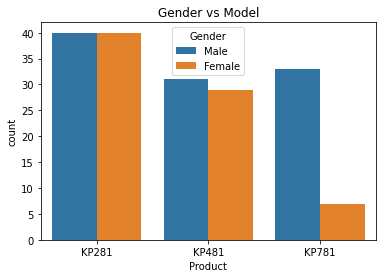

In [11]:
sns.countplot(x='Product',hue="Gender",data=df)
plt.title('Gender vs Model')
plt.show()

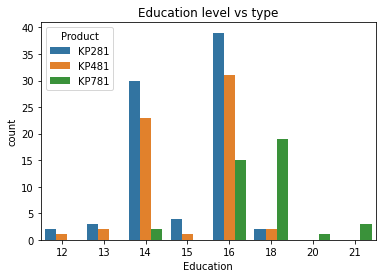

In [12]:
sns.countplot(x='Education',data=df,hue='Product')
plt.title('Education level vs type')
plt.show() 

In [16]:
df_male = df.loc[df['Gender'] == "Male"]
df_female = df.loc[df['Gender'] == "Female"]

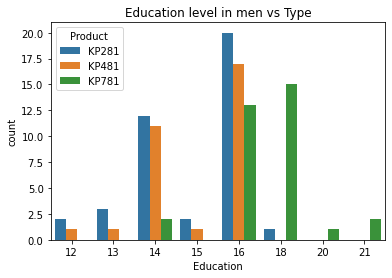

In [17]:
sns.countplot(x="Education",data=df_male,hue="Product")
plt.title("Education level in men vs Type")
plt.show()

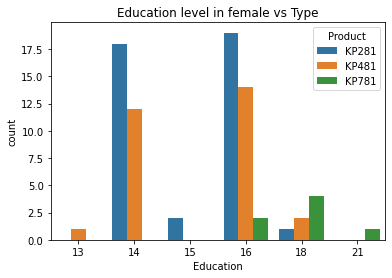

In [18]:
sns.countplot(x="Education",data=df_female,hue="Product")
plt.title("Education level in female vs Type")
plt.show()


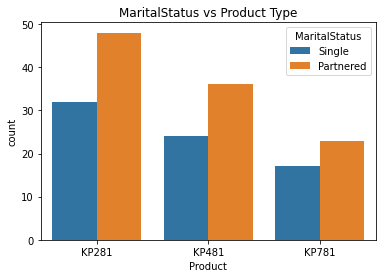

In [19]:
sns.countplot(x='Product',data=df,hue="MaritalStatus")
plt.title("MaritalStatus vs Product Type")
plt.show()

## Bivariate Analysis

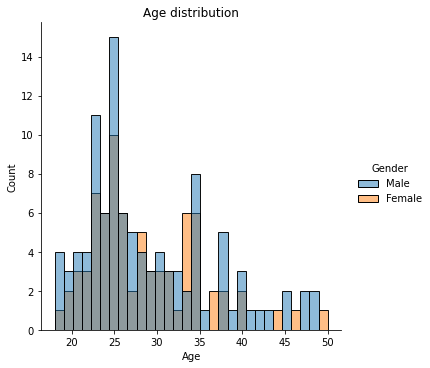

In [20]:
ax = sns.displot(x ="Age",data = df,hue="Gender",bins=30)
plt.title("Age distribution")
plt.show()

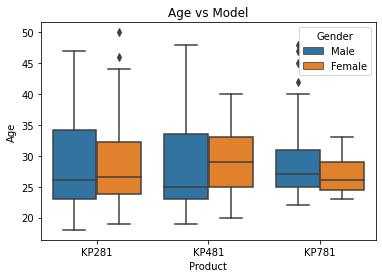

In [21]:
sns.boxplot(x='Product',y='Age',hue="Gender",data=df)
plt.title('Age vs Model')
plt.show()

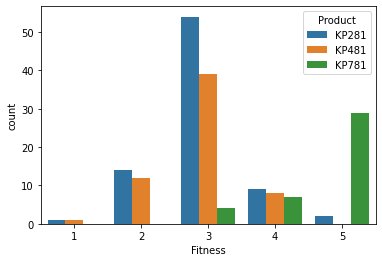

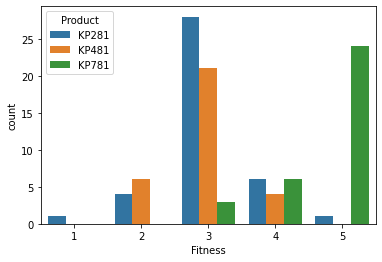

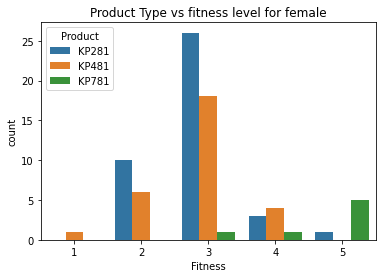

In [22]:
sns.countplot(x='Fitness',data=df,hue="Product")
plt.title("")
plt.show()

df_male = df.loc[df['Gender'] == "Male"]
sns.countplot(x="Fitness",hue='Product',data=df_male)
plt.legend(loc="upper left",title="Product")
plt.show()

df_female = df.loc[df['Gender'] == "Female"]
sns.countplot(x="Fitness",hue='Product',data=df_female)
plt.title('Product Type vs fitness level for female')
plt.legend(loc="upper left",title="Product")
plt.show()

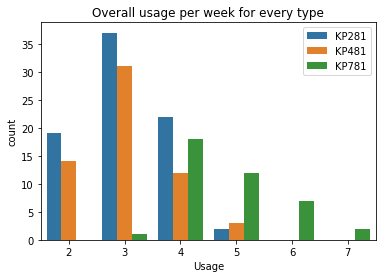

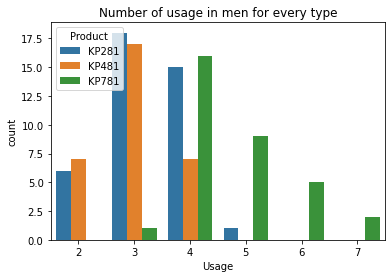

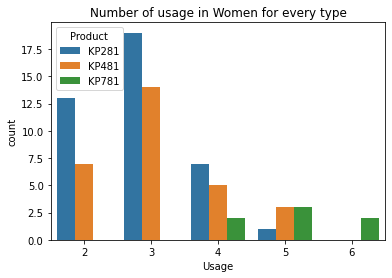

In [23]:
sns.countplot(x='Usage',data=df,hue="Product")
plt.legend(loc='upper right')
plt.title("Overall usage per week for every type")
plt.show()


sns.countplot(x="Usage",hue='Product',data=df_male)
plt.legend(loc="upper left",title="Product")
plt.title("Number of usage in men for every type")
plt.show()


sns.countplot(x="Usage",hue='Product',data=df_female)
plt.title('Number of usage in Women for every type')
plt.legend(loc="upper left",title="Product")
plt.show()